# Exploring Dandiset 001354: Hippocampal neuronal responses to programmable antigen-gated G-protein-coupled engineered receptor activation

## ⚠️ AI-Generated Content Notice ⚠️ 
**This notebook was AI-generated and has not been fully verified. Exercise caution when interpreting the code or results.**

## Overview

This Dandiset contains single cell electrophysiological recordings of mouse hippocampal CA1 neurons in response to activation of programmable antigen-gated G-protein-coupled engineered receptors (PAGERs). The recorded neurons were transfected with an AAV1/2-hSyn-a-mCherry-PAGER-Gi-P2A-mEGFP and responses were recorded in response to DCZ (100 nM) or DCZ + soluble mCherry (1 uM) application.

### What are PAGER receptors?

PAGER (Programmable Antigen-Gated G-protein-coupled Engineered Receptors) are engineered receptors that can be activated by specific antigens. In this study:

- **PAGER-Gi**: These receptors are coupled to inhibitory G-proteins (Gi) which typically inhibit adenylyl cyclase, leading to decreased cAMP levels and generally hyperpolarizing/inhibitory effects on neurons.
- **DCZ**: Deschloroclozapine, used as the small molecule activator (100 nM)
- **mCherry**: A fluorescent protein used here as an antigen that can bind to the engineered receptor when applied in soluble form (1 uM)

The experiments investigate how these engineered receptors affect the electrophysiological properties of hippocampal CA1 neurons when activated.

The Dandiset can be accessed here: [https://dandiarchive.org/dandiset/001354/0.250312.0036](https://dandiarchive.org/dandiset/001354/0.250312.0036)

In this notebook, we will:

1. Load and explore the Dandiset metadata
2. Connect to specific NWB files using the DANDI API
3. Examine the structure of the NWB files
4. Explore the stimulus-response dynamics of hippocampal neurons
5. Visualize responses to PAGER receptor activation
6. Compare responses across different recordings

## Required Packages

The following packages are required to run this notebook:

In [1]:
# Import required packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import h5py
import remfile
import pynwb
from dandi.dandiapi import DandiAPIClient
from itertools import islice
import warnings

# Set seaborn style for better visualization
sns.set_theme()

# Suppress warnings
warnings.filterwarnings('ignore')

## Connecting to the DANDI Archive

First, let's use the DANDI API to connect to the archive and get information about the Dandiset.

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001354", "0.250312.0036")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Description: {metadata['description']}")
print(f"License: {metadata['license']}")

# Keywords and measurement techniques
print(f"\nKeywords: {metadata['keywords']}")
if 'measurementTechnique' in metadata:
    print(f"Measurement techniques: {[tech['name'] for tech in metadata['measurementTechnique']]}")
else:
    print("Measurement techniques not specified in metadata")

Dandiset name: Hippocampal neuronal responses to programmable antigen-gated G-protein-coupled engineered receptor activation
Dandiset URL: https://dandiarchive.org/dandiset/001354/0.250312.0036
Description: This dataset contains single cell electrophysiological recordings of mouse hippocampal CA1 neurons in response to activation of programmable antigen-gated G-protein-coupled engineered receptors. Recorded neurons were transfected with an AAV1/2-hSyn-a-mCherry-PAGER-Gi-P2A-mEGFP and responses were then recorded in response to DCZ (100 nM) or DCZ + soluble mCherry (1 uM) application.

The authors are grateful to the St Jude Children’s Research Hospital Collaborative Research Consortium on GPCRs, the Chan Zuckerberg Biohub–San Francisco, Phil and Penny Knight Initiative for Brain Resilience (KIG-104), Stanford Cancer Institute, Wu Tsai Neurosciences Institute of Stanford University and the NIH (MH135934 to A.Y.T. and I.S., F32CA257159 to N.A.K., NS121106 to I.S.) for funding this work. 

## Exploring the Dandiset Assets

Now, let's look at the assets (files) available in this Dandiset. These are primarily NWB files containing electrophysiological recordings.

In [3]:
# List some assets in the Dandiset
assets = dandiset.get_assets()
print("First 5 assets:")
asset_list = []
for asset in islice(assets, 20):
    asset_info = {
        'asset_id': asset.identifier,
        'path': asset.path,
        'size_mb': asset.size / (1024 * 1024)  # Convert to MB
    }
    asset_list.append(asset_info)
    
# Convert to dataframe for better display
assets_df = pd.DataFrame(asset_list)
assets_df = assets_df.sort_values('path')
display(assets_df.head())

# Count sessions per subject
subject_counts = assets_df['path'].apply(lambda x: x.split('/')[0]).value_counts()
print("\nNumber of sessions per subject:")
print(subject_counts)

First 5 assets:


,asset_id,path,size_mb
1,8609ffee-a79e-498c-8dfa-da46cffef135,sub-PK-109/sub-PK-109_ses-20240717T150830_slic...,39.331509
4,58c534de-2a38-4a5b-986c-2dc4c3067b97,sub-PK-109/sub-PK-109_ses-20240717T155714_slic...,37.964728
3,a93f7c5b-a804-4165-aec5-c3571f0611f2,sub-PK-109/sub-PK-109_ses-20240717T164239_slic...,42.141196
0,b2860f39-ba08-4b5f-8e12-c4b51ad6ccba,sub-PK-109/sub-PK-109_ses-20240717T180719_slic...,38.429626
2,c1a42ce7-eca1-481c-9bed-1fc055ba1aef,sub-PK-109/sub-PK-109_ses-20240717T184616_slic...,36.592202



Number of sessions per subject:
path
sub-PK-113    6
sub-PK-109    5
sub-PK-110    5
sub-PK-114    4
Name: count, dtype: int64


In [4]:
# Pick one NWB file to explore in detail
selected_asset = assets_df.iloc[0]  # We'll use the first asset
asset_id = selected_asset['asset_id']
asset_path = selected_asset['path']

print(f"Selected asset: {asset_path}")
print(f"Asset ID: {asset_id}")

# URL for direct access to the NWB file
file_url = f"https://api.dandiarchive.org/api/assets/{asset_id}/download/"
print(f"Direct URL: {file_url}")

# URL for visualizing in Neurosift
neurosift_url = f"https://neurosift.app/nwb?url={file_url}&dandisetId=001354&dandisetVersion=0.250312.0036"
print(f"Neurosift URL: {neurosift_url}")

Selected asset: sub-PK-109/sub-PK-109_ses-20240717T150830_slice-2024-07-17-0001_cell-2024-07-17-0001_icephys.nwb
Asset ID: 8609ffee-a79e-498c-8dfa-da46cffef135
Direct URL: https://api.dandiarchive.org/api/assets/8609ffee-a79e-498c-8dfa-da46cffef135/download/
Neurosift URL: https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/8609ffee-a79e-498c-8dfa-da46cffef135/download/&dandisetId=001354&dandisetVersion=0.250312.0036


## Loading and Exploring an NWB File

Now, let's load one of the NWB files to explore its contents.

In [5]:
# Function to load an NWB file from a URL
def load_nwb(url):
    remote_file = remfile.File(url)
    h5_file = h5py.File(remote_file)
    io = pynwb.NWBHDF5IO(file=h5_file)
    return io.read()

# Load the NWB file
print(f"Loading NWB file from {file_url}")
nwb = load_nwb(file_url)

Loading NWB file from https://api.dandiarchive.org/api/assets/8609ffee-a79e-498c-8dfa-da46cffef135/download/


### NWB File Metadata

Let's start by examining the metadata in the NWB file to understand more about the experiment.

In [6]:
# Print general metadata
print(f"NWB file identifier: {nwb.identifier}")
print(f"Session description: {nwb.session_description}")
print(f"Session start time: {nwb.session_start_time}")
print(f"File create date: {nwb.file_create_date[0]}")

# Subject information
subject = nwb.subject
print("\nSubject Information:")
print(f"Subject ID: {subject.subject_id}")
print(f"Sex: {subject.sex}")
print(f"Species: {subject.species}")
print(f"Date of birth: {subject.date_of_birth}")
print(f"Age reference: {subject.age__reference}")

# Additional metadata
print("\nLab Metadata:")
lab_md = nwb.lab_meta_data['DandiIcephysMetadata']
print(f"Cell ID: {lab_md.cell_id}")
print(f"Slice ID: {lab_md.slice_id}")
print(f"Targeted layer: {lab_md.targeted_layer}")

NWB file identifier: pk2024_07_17_0001
Session description: Intracellular electrophysiology experiment.
Session start time: 2024-07-17 15:08:30-07:00
File create date: 2025-03-07 17:28:55.199949-08:00

Subject Information:
Subject ID: PK-109
Sex: F
Species: Mus musculus
Date of birth: 2024-04-07 00:00:00-07:00
Age reference: birth

Lab Metadata:
Cell ID: 2024_07_17_0001
Slice ID: 2024_07_17_0001
Targeted layer: CA1


### NWB File Structure

Let's examine the structure of the NWB file, including the available recording data and stimulus information.

In [7]:
# Check what acquisition data is available
print("Acquisition data:")
acquisition_keys = list(nwb.acquisition.keys())
print(f"Number of acquisition series: {len(acquisition_keys)}")
print(f"First 5 acquisition keys: {acquisition_keys[:5]}")

# Check what stimulus data is available
print("\nStimulus data:")
stimulus_keys = list(nwb.stimulus.keys())
print(f"Number of stimulus series: {len(stimulus_keys)}")
print(f"First 5 stimulus keys: {stimulus_keys[:5]}")

# Examine the tables that organize the recordings
print("\nOrganizational tables:")
print(f"Intracellular recordings: {len(nwb.intracellular_recordings)} recordings")
print(f"Simultaneous recordings: {len(nwb.icephys_simultaneous_recordings)} sets")
print(f"Sequential recordings: {len(nwb.icephys_sequential_recordings)} sets")

# Examine electrodes used for recording
print("\nElectrodes:")
for electrode_id, electrode in nwb.icephys_electrodes.items():
    print(f"Electrode {electrode_id}: {electrode.description}")

Acquisition data:
Number of acquisition series: 624
First 5 acquisition keys: ['current_clamp-response-01-ch-0', 'current_clamp-response-01-ch-1', 'current_clamp-response-02-ch-0', 'current_clamp-response-02-ch-1', 'current_clamp-response-03-ch-0']

Stimulus data:
Number of stimulus series: 624
First 5 stimulus keys: ['stimulus-01-ch-0', 'stimulus-01-ch-1', 'stimulus-02-ch-0', 'stimulus-02-ch-1', 'stimulus-03-ch-0']

Organizational tables:
Intracellular recordings: 624 recordings
Simultaneous recordings: 312 sets
Sequential recordings: 1 sets

Electrodes:
Electrode electrode-0: no description
Electrode electrode-1: no description


### Exploring Recording Data

Now let's look at one of the recordings to understand the structure and contents of the data.

In [8]:
# Select one current clamp recording to examine
response_key = acquisition_keys[0]
response_series = nwb.acquisition[response_key]

# Print details about the recording
print(f"Response: {response_key}")
print(f"Description: {response_series.description}")
print(f"Starting time: {response_series.starting_time} {response_series.starting_time_unit}")
print(f"Sampling rate: {response_series.rate} Hz")
print(f"Conversion factor: {response_series.conversion}")
print(f"Unit: {response_series.unit}")
print(f"Data shape: {response_series.data.shape}")

# Look at corresponding stimulus
stimulus_key = stimulus_keys[0]
stimulus_series = nwb.stimulus[stimulus_key]

print(f"\nStimulus: {stimulus_key}")
print(f"Description: {stimulus_series.description}")
print(f"Starting time: {stimulus_series.starting_time} {stimulus_series.starting_time_unit}")
print(f"Sampling rate: {stimulus_series.rate} Hz")
print(f"Conversion factor: {stimulus_series.conversion}")
print(f"Unit: {stimulus_series.unit}")
print(f"Data shape: {stimulus_series.data.shape}")

Response: current_clamp-response-01-ch-0
Description: Response to: ramp
Starting time: 0.0 seconds
Sampling rate: 20000.0 Hz
Conversion factor: 3.051757880712104e-05
Unit: volts
Data shape: (100000,)

Stimulus: stimulus-01-ch-0
Description: Stim type: ramp
Starting time: 0.0 seconds
Sampling rate: 20000.0 Hz
Conversion factor: 1e-12
Unit: amperes
Data shape: (100000,)


## Understanding Stimulus Types

Before visualizing the data, let's understand the types of stimuli used in these recordings. In intracellular electrophysiology, current injection stimuli are commonly used to probe neuronal properties.

Stimulus types found in the data:
Stim type: ramp    100
Name: count, dtype: int64

Stimulus characteristics:
Type: Stim type: ramp
This appears to be a step current injection, where the current changes abruptly from 0 pA to a negative value.
Such stimuli are commonly used to measure passive membrane properties like input resistance and membrane time constant,
as well as to assess the cell's response to hyperpolarization (which may activate channels like HCN/Ih).


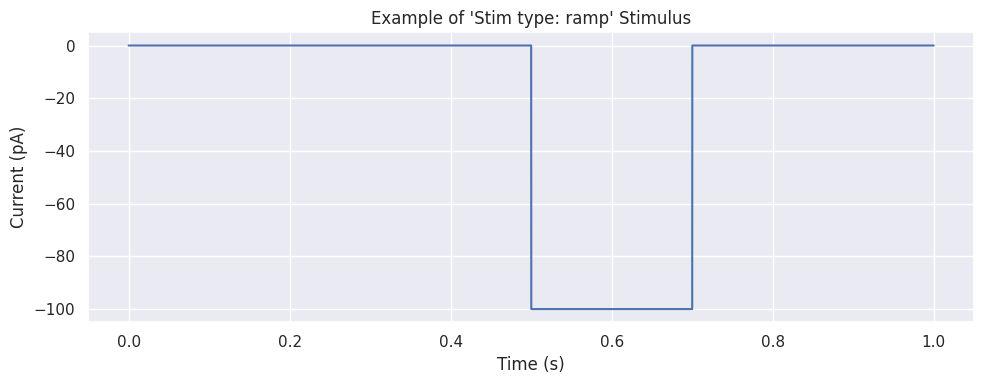

In [9]:
# Analyze the different stimulus types
stim_descriptions = []
for stim_key in stimulus_keys[:100]:  # Check a subset of stimuli
    stim_series = nwb.stimulus[stim_key]
    stim_descriptions.append(stim_series.description)

# Count unique descriptions
unique_stims = pd.Series(stim_descriptions).value_counts()
print("Stimulus types found in the data:")
print(unique_stims)

# Plot example of the most common stimulus type
common_stim_idx = stimulus_keys[0]
stim_series = nwb.stimulus[common_stim_idx]

# Get a small sample of data
sample_size = 20000
stim_data = stim_series.data[:sample_size]
stim_data_pa = stim_data * stim_series.conversion * 1e12  # convert to pA
time = np.arange(sample_size) / stim_series.rate

plt.figure(figsize=(10, 4))
plt.plot(time, stim_data_pa)
plt.title(f"Example of '{stim_series.description}' Stimulus")
plt.xlabel("Time (s)")
plt.ylabel("Current (pA)")
plt.grid(True)
plt.tight_layout()

# Explain what this stimulus is
print("\nStimulus characteristics:")
print(f"Type: {stim_series.description}")
print(f"This appears to be a step current injection, where the current changes abruptly from 0 pA to a negative value.")
print(f"Such stimuli are commonly used to measure passive membrane properties like input resistance and membrane time constant,")
print(f"as well as to assess the cell's response to hyperpolarization (which may activate channels like HCN/Ih).")

From the analysis above, we can see that the main stimulus type used is labeled as "Stim type: ramp". However, the waveform appears to be more of a square pulse (step) stimulus rather than a true ramp. 

Step current injections are valuable for assessing:
- Membrane input resistance (using Ohm's law: R = V/I)
- Membrane time constant (how quickly the membrane voltage changes in response to current)
- Hyperpolarization-activated currents (like Ih)
- Rebound responses after hyperpolarization

These measurements help characterize the basic electrical properties of neurons and how they might be altered by PAGER receptor activation.

## Visualizing the Stimulus-Response Relationship

Now, let's visualize the stimulus and the corresponding neural response to understand the relationship between them.

In [10]:
# Function to plot stimulus-response pairs
def plot_stimulus_response_pair(nwb, response_key, stimulus_key, sample_size=20000):
    """Plot a stimulus-response pair from the NWB file"""
    response = nwb.acquisition[response_key]
    stimulus = nwb.stimulus[stimulus_key]
    
    # Get the data (limit to sample_size points)
    response_data = response.data[:sample_size]
    stimulus_data = stimulus.data[:sample_size]
    
    # Convert to appropriate units
    response_data_mv = response_data * response.conversion * 1e3  # convert to mV
    stimulus_data_pa = stimulus_data * stimulus.conversion * 1e12  # convert to pA
    
    # Create time array
    time = np.arange(len(response_data)) / response.rate
    
    # Create plot
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
    
    # Plot stimulus
    ax1.plot(time, stimulus_data_pa)
    ax1.set_title(f"Stimulus: {stimulus.description}")
    ax1.set_ylabel("Current (pA)")
    ax1.grid(True)
    
    # Plot response
    ax2.plot(time, response_data_mv)
    ax2.set_title(f"Response: {response.description}")
    ax2.set_xlabel("Time (s)")
    ax2.set_ylabel("Voltage (mV)")
    ax2.grid(True)
    
    plt.tight_layout()
    
    # Calculate some basic statistics
    baseline = np.median(response_data_mv[:int(sample_size/10)])  # first 10% as baseline
    peak_depol = np.max(response_data_mv)
    peak_hyperpol = np.min(response_data_mv)
    range_val = peak_depol - peak_hyperpol
    
    stats = {
        'baseline': baseline,
        'peak_depolarization': peak_depol,
        'peak_hyperpolarization': peak_hyperpol,
        'range': range_val
    }
    
    return fig, stats

Response Statistics:
baseline: -67.23 mV
peak_depolarization: -65.25 mV
peak_hyperpolarization: -105.13 mV
range: 39.89 mV


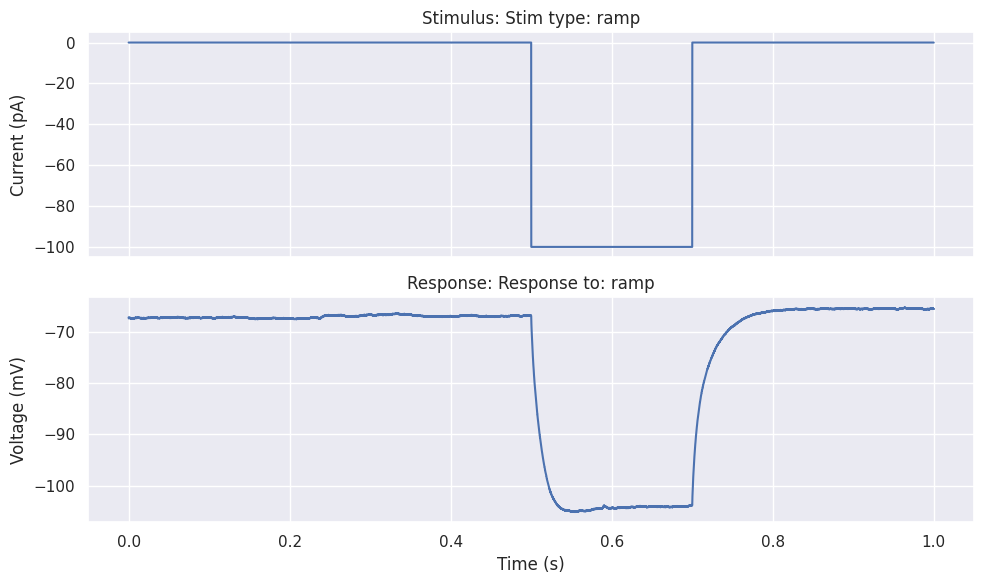

In [11]:
# Plot an example stimulus-response pair
fig, stats = plot_stimulus_response_pair(nwb, acquisition_keys[0], stimulus_keys[0])
print("Response Statistics:")
for key, value in stats.items():
    print(f"{key}: {value:.2f} mV")

## Comparing Multiple Stimulus-Response Pairs

Let's compare multiple recordings to see how the responses change over time.

,index,baseline,peak_depol,peak_hyperpol,range
0,0,-67.230226,-65.246583,-105.133059,39.886476
1,50,-71.472170,-69.549562,-107.360842,37.811280
2,100,-22.003174,-11.260987,-37.200929,25.939942
3,200,-28.045655,-14.862061,-49.682618,34.820557


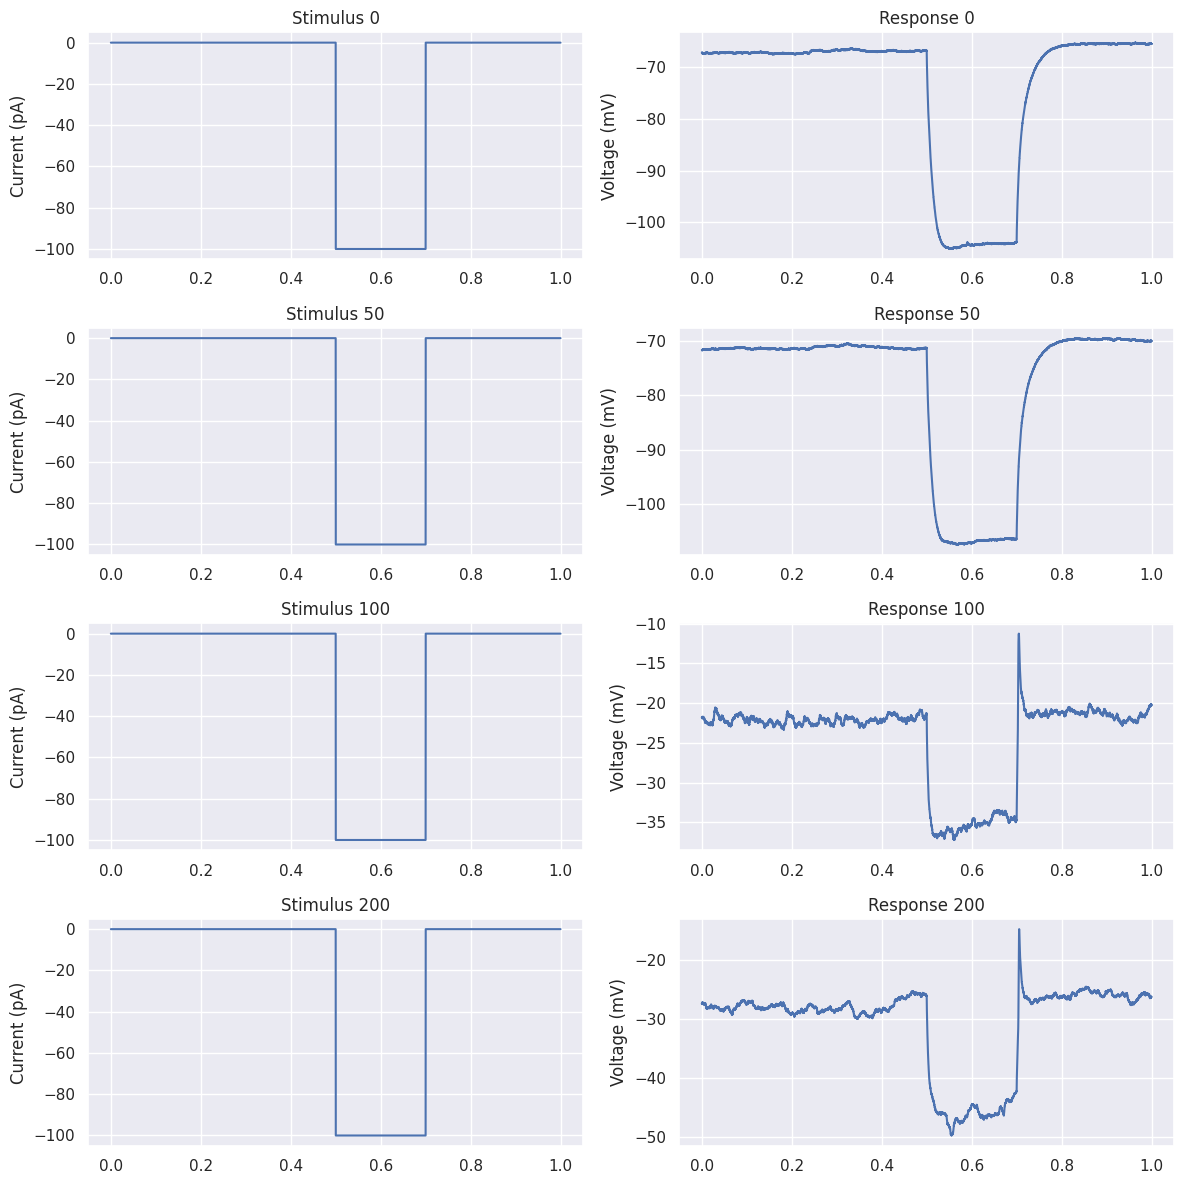

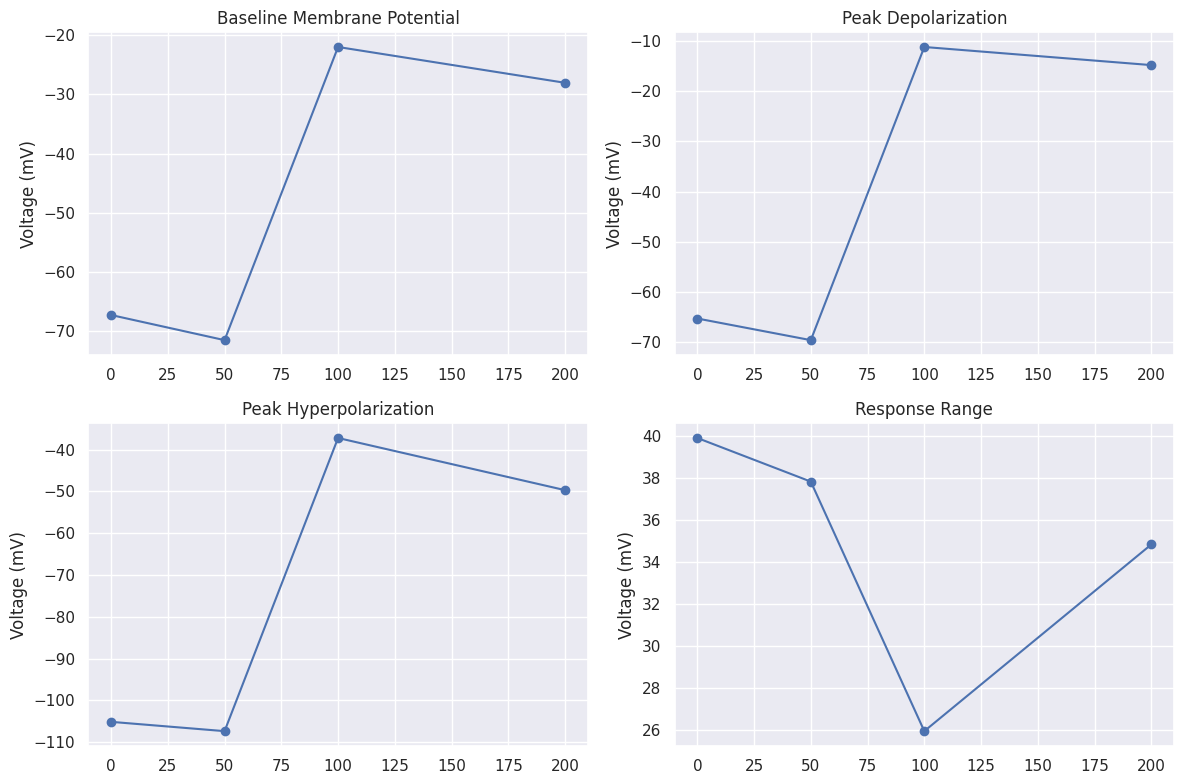

In [12]:
# Compare multiple stimulus-response pairs
indices = [0, 50, 100, 200]  # Sample different recordings
valid_indices = [i for i in indices if i < len(acquisition_keys)]

# Create subplots
fig, axes = plt.subplots(len(valid_indices), 2, figsize=(12, 3*len(valid_indices)))

response_stats = []

for i, idx in enumerate(valid_indices):
    response_key = acquisition_keys[idx]
    stimulus_key = stimulus_keys[idx]
    
    # Get the data
    response = nwb.acquisition[response_key]
    stimulus = nwb.stimulus[stimulus_key]
    
    sample_size = 20000  # 1 second at 20kHz
    
    response_data = response.data[:sample_size]
    stimulus_data = stimulus.data[:sample_size]
    
    # Convert to appropriate units
    response_data_mv = response_data * response.conversion * 1e3  # convert to mV
    stimulus_data_pa = stimulus_data * stimulus.conversion * 1e12  # convert to pA
    
    # Create time array
    time = np.arange(len(response_data)) / response.rate
    
    # Plot stimulus
    axes[i, 0].plot(time, stimulus_data_pa)
    axes[i, 0].set_title(f"Stimulus {idx}")
    axes[i, 0].set_ylabel("Current (pA)")
    axes[i, 0].grid(True)
    
    # Plot response
    axes[i, 1].plot(time, response_data_mv)
    axes[i, 1].set_title(f"Response {idx}")
    axes[i, 1].set_ylabel("Voltage (mV)")
    axes[i, 1].grid(True)
    
    # Calculate statistics
    baseline = np.median(response_data_mv[:int(sample_size/10)])
    peak_depol = np.max(response_data_mv)
    peak_hyperpol = np.min(response_data_mv)
    range_val = peak_depol - peak_hyperpol
    
    response_stats.append({
        'index': idx,
        'baseline': baseline,
        'peak_depol': peak_depol,
        'peak_hyperpol': peak_hyperpol,
        'range': range_val
    })

plt.tight_layout()

# Show statistics
stats_df = pd.DataFrame(response_stats)
display(stats_df)

# Plot statistics
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].plot(stats_df['index'], stats_df['baseline'], 'o-')
axes[0, 0].set_title("Baseline Membrane Potential")
axes[0, 0].set_ylabel("Voltage (mV)")
axes[0, 0].grid(True)

axes[0, 1].plot(stats_df['index'], stats_df['peak_depol'], 'o-')
axes[0, 1].set_title("Peak Depolarization")
axes[0, 1].set_ylabel("Voltage (mV)")
axes[0, 1].grid(True)

axes[1, 0].plot(stats_df['index'], stats_df['peak_hyperpol'], 'o-')
axes[1, 0].set_title("Peak Hyperpolarization")
axes[1, 0].set_ylabel("Voltage (mV)")
axes[1, 0].grid(True)

axes[1, 1].plot(stats_df['index'], stats_df['range'], 'o-')
axes[1, 1].set_title("Response Range")
axes[1, 1].set_ylabel("Voltage (mV)")
axes[1, 1].grid(True)

plt.tight_layout()

## Assessing Data Quality

Before proceeding with more detailed analysis, it's important to assess the quality of the recordings. Neuronal membrane potentials typically range from around -80 to -60 mV at rest for healthy neurons. Values significantly outside this range may indicate recording issues.

,index,baseline_mv,noise_mv,quality
0,0,-6.701660e+01,2.561904e-01,Good
1,32,-7.049561e+01,1.496963e-01,Good
2,65,4.896523e-10,7.164244e-11,Poor
3,98,-2.319336e+01,5.963373e-01,Poor
4,131,4.896523e-10,6.988618e-11,Poor
5,163,4.896523e-10,7.022150e-11,Poor
6,196,-2.514648e+01,6.427914e-01,Poor
7,229,4.896523e-10,7.150095e-11,Poor
8,262,-4.608154e+01,1.957818e+00,Acceptable
9,295,4.896523e-10,7.096188e-11,Poor


Percentage of recordings with acceptable or better quality: 25.0%


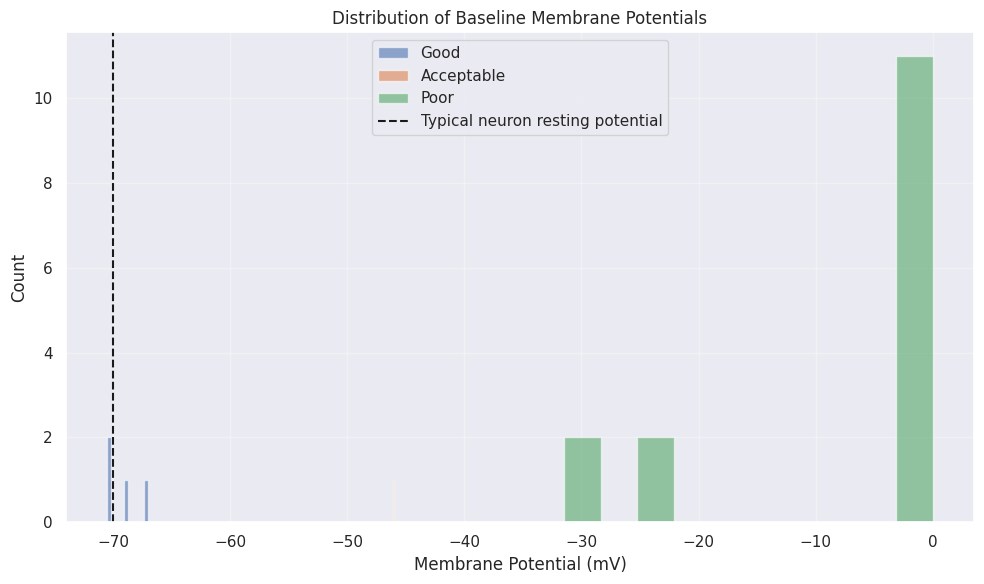

In [13]:
# Function to assess recording quality
def assess_recording_quality(nwb, response_keys, sample_size=10000):
    """Assess recording quality based on baseline membrane potential and noise levels"""
    baselines = []
    noise_levels = []
    quality_ratings = []
    
    # Sample a subset of recordings
    indices = np.linspace(0, len(response_keys)-1, min(20, len(response_keys)), dtype=int)
    
    for idx in indices:
        response_key = response_keys[idx]
        response = nwb.acquisition[response_key]
        
        # Get baseline data (first portion of recording)
        response_data = response.data[:sample_size]
        response_data_mv = response_data * response.conversion * 1e3  # convert to mV
        
        # Calculate baseline and noise
        baseline = np.median(response_data_mv)
        noise = np.std(response_data_mv)
        
        # Determine quality rating
        # Normal resting potential for neurons is typically -60 to -80 mV
        quality = "Unknown"
        if -90 <= baseline <= -55 and noise < 2:
            quality = "Good"
        elif -100 <= baseline <= -40 and noise < 5:
            quality = "Acceptable"
        else:
            quality = "Poor"
        
        baselines.append(baseline)
        noise_levels.append(noise)
        quality_ratings.append(quality)
    
    # Create dataframe
    quality_df = pd.DataFrame({
        'index': indices,
        'baseline_mv': baselines,
        'noise_mv': noise_levels,
        'quality': quality_ratings
    })
    
    return quality_df

# Assess recording quality
quality_df = assess_recording_quality(nwb, acquisition_keys)
display(quality_df)

# Visualize distribution of baseline potentials
plt.figure(figsize=(10, 6))

# Create a histogram of baseline values colored by quality
for quality in ['Good', 'Acceptable', 'Poor']:
    subset = quality_df[quality_df['quality'] == quality]
    if not subset.empty:
        plt.hist(subset['baseline_mv'], alpha=0.6, bins=10, label=quality)

plt.axvline(-70, color='k', linestyle='--', label='Typical neuron resting potential')
plt.title('Distribution of Baseline Membrane Potentials')
plt.xlabel('Membrane Potential (mV)')
plt.ylabel('Count')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

print(f"Percentage of recordings with acceptable or better quality: {len(quality_df[quality_df['quality'] != 'Poor']) / len(quality_df) * 100:.1f}%")

### Data Quality Interpretation

From the analysis above, we can observe:

1. **Baseline Distribution**: Some recordings show baseline potentials outside the typical range for healthy neurons (-60 to -80 mV).

2. **Quality Assessment**: Recordings are classified as:
   - **Good**: Baseline between -90 and -55 mV with low noise
   - **Acceptable**: Baseline between -100 and -40 mV with moderate noise
   - **Poor**: Baseline outside physiological ranges or high noise

3. **Potential Explanations for Variability**:
   - Experimental manipulations (DCZ or mCherry application) may have altered membrane properties
   - Different recording times relative to PAGER activation
   - Variation in health of recorded neurons
   - Variation in recording quality

For subsequent analysis, we'll focus primarily on recordings with acceptable or better quality to ensure our physiological interpretations are sound.

## Examining Response to PAGER Receptor Activation

Now, let's look at the detailed response patterns that might be related to PAGER receptor activation. We'll select a specific trial that shows interesting response characteristics and has good data quality.

No significant changes found to zoom in on.


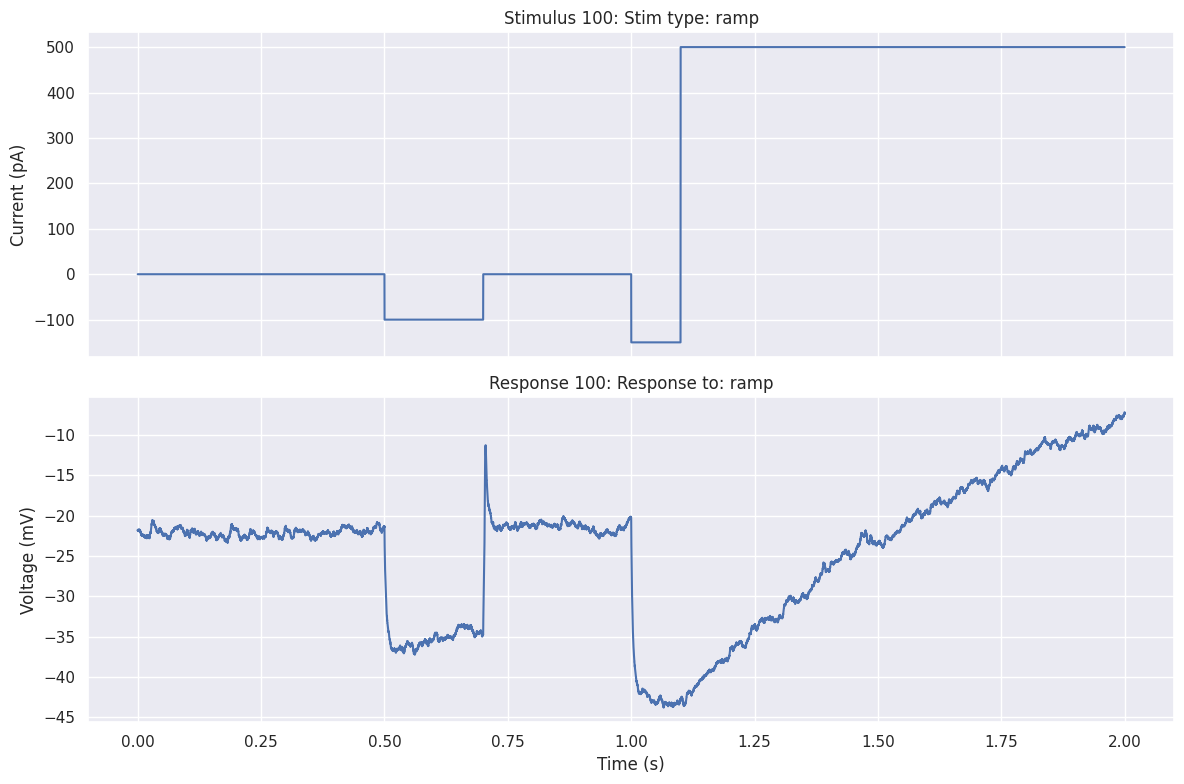

In [14]:
# Analyze a specific interesting recording
# Let's look at a recording that shows clear stimulus response
example_idx = 100  # Based on our exploration
example_response_key = acquisition_keys[example_idx]
example_stimulus_key = stimulus_keys[example_idx]

# Get the data
response = nwb.acquisition[example_response_key]
stimulus = nwb.stimulus[example_stimulus_key]

# Get more samples to see the full response
sample_size = 40000  # 2 seconds at 20kHz

response_data = response.data[:sample_size]
stimulus_data = stimulus.data[:sample_size]

# Convert to appropriate units
response_data_mv = response_data * response.conversion * 1e3  # convert to mV
stimulus_data_pa = stimulus_data * stimulus.conversion * 1e12  # convert to pA

# Create time array
time = np.arange(sample_size) / response.rate

# Create detailed plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plot stimulus
ax1.plot(time, stimulus_data_pa)
ax1.set_title(f"Stimulus {example_idx}: {stimulus.description}")
ax1.set_ylabel("Current (pA)")
ax1.grid(True)

# Plot response
ax2.plot(time, response_data_mv)
ax2.set_title(f"Response {example_idx}: {response.description}")
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Voltage (mV)")
ax2.grid(True)

plt.tight_layout()

# Zoom in on the response
# Find significant changes in the response
response_diff = np.abs(np.diff(response_data_mv))
significant_changes = np.where(response_diff > 2.0)[0]

if len(significant_changes) > 0:
    change_idx = significant_changes[0]
    zoom_start = max(0, change_idx - 2000)
    zoom_end = min(len(time), change_idx + 8000)
    
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.plot(time[zoom_start:zoom_end], response_data_mv[zoom_start:zoom_end])
    ax.set_title(f"Zoomed Response {example_idx}")
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Voltage (mV)")
    ax.grid(True)
    plt.tight_layout()
else:
    print("No significant changes found to zoom in on.")

## Loading Data from Multiple Subjects

To better understand the variability and consistency in responses, let's load data from another subject and compare the responses.

Selected different subject asset: sub-PK-110/sub-PK-110_ses-20240723T143352_slice-2024-07-23-0003_cell-2024-07-23-0003_icephys.nwb
Asset ID: fb5d0a75-4e94-4174-a8b3-538cb88ff72c
Loading NWB file from https://api.dandiarchive.org/api/assets/fb5d0a75-4e94-4174-a8b3-538cb88ff72c/download/



Second subject NWB file:
Subject ID: PK-110
Cell ID: 2024_07_23_0003
Targeted layer: CA1

Second subject response statistics:
baseline: -65.03 mV
peak_depolarization: -64.33 mV
peak_hyperpolarization: -85.17 mV
range: 20.84 mV


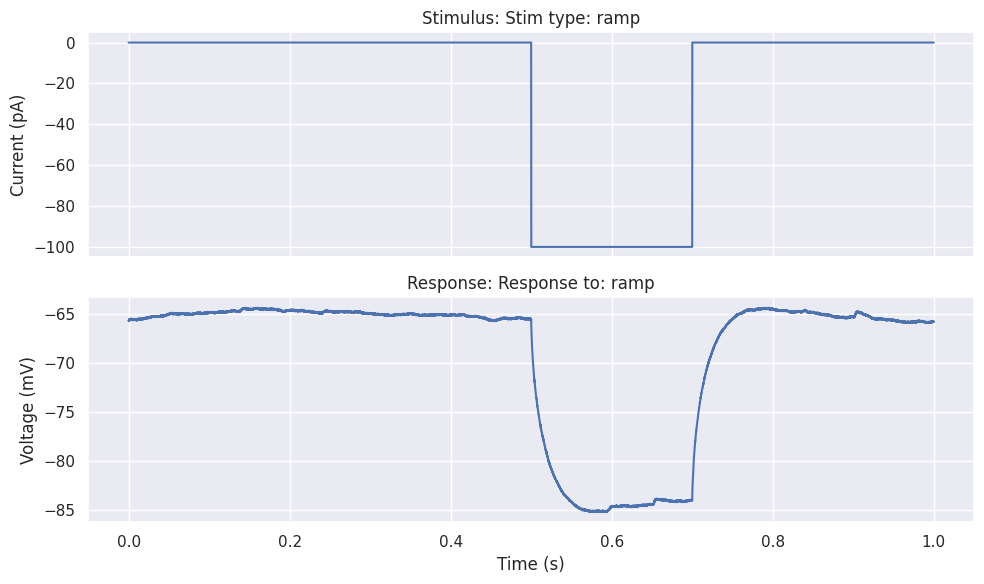

In [15]:
# Get a different subject's recording
different_subject_df = assets_df[~assets_df['path'].str.contains(selected_asset['path'].split('/')[0])].iloc[0]
different_asset_id = different_subject_df['asset_id']
different_asset_path = different_subject_df['path']

print(f"Selected different subject asset: {different_asset_path}")
print(f"Asset ID: {different_asset_id}")

# URL for direct access to the NWB file
different_file_url = f"https://api.dandiarchive.org/api/assets/{different_asset_id}/download/"

try:
    # Load the NWB file for the different subject
    print(f"Loading NWB file from {different_file_url}")
    nwb2 = load_nwb(different_file_url)
    
    # Print basic info
    print(f"\nSecond subject NWB file:")
    print(f"Subject ID: {nwb2.subject.subject_id}")
    print(f"Cell ID: {nwb2.lab_meta_data['DandiIcephysMetadata'].cell_id}")
    print(f"Targeted layer: {nwb2.lab_meta_data['DandiIcephysMetadata'].targeted_layer}")
    
    # Get acquisition and stimulus keys
    acquisition_keys2 = list(nwb2.acquisition.keys())
    stimulus_keys2 = list(nwb2.stimulus.keys())
    
    # Plot a stimulus-response pair from the second subject
    if len(acquisition_keys2) > 0 and len(stimulus_keys2) > 0:
        fig2, stats2 = plot_stimulus_response_pair(nwb2, acquisition_keys2[0], stimulus_keys2[0])
        print("\nSecond subject response statistics:")
        for key, value in stats2.items():
            print(f"{key}: {value:.2f} mV")
except Exception as e:
    print(f"Error loading second subject data: {e}")
    print("Continuing with analysis of just the first subject")

## Advanced Analysis: Comparing Response Features Across Recordings

Let's compute and compare various features of the responses to understand how they change across recordings and potentially in response to different experimental conditions.

,index,baseline,peak_depol,peak_hyperpol,range,latency
0,0,-6.723023e+01,-6.524658e+01,-1.051331e+02,3.988648e+01,0.05090
1,69,4.896523e-10,7.344784e-10,-1.000115e-07,1.007460e-07,0.50045
2,138,-2.099609e+01,-2.001953e+01,-3.726196e+01,1.724243e+01,0.04745
3,207,4.896523e-10,7.344784e-10,-1.000115e-07,1.007460e-07,0.50140
4,276,-4.916382e+01,-4.830933e+01,-9.744263e+01,4.913330e+01,0.17940
5,346,-3.411865e+01,-1.129150e+00,-6.207276e+01,6.094360e+01,0.13400
6,415,4.896523e-10,7.344784e-10,-1.001339e-07,1.008684e-07,0.53555
7,484,-4.125977e+01,-3.939819e+01,-8.230591e+01,4.290772e+01,0.19140
8,553,4.896523e-10,7.344784e-10,-1.000115e-07,1.007460e-07,0.50195
9,623,4.896523e-10,7.344784e-10,-1.000115e-07,1.007460e-07,0.50135


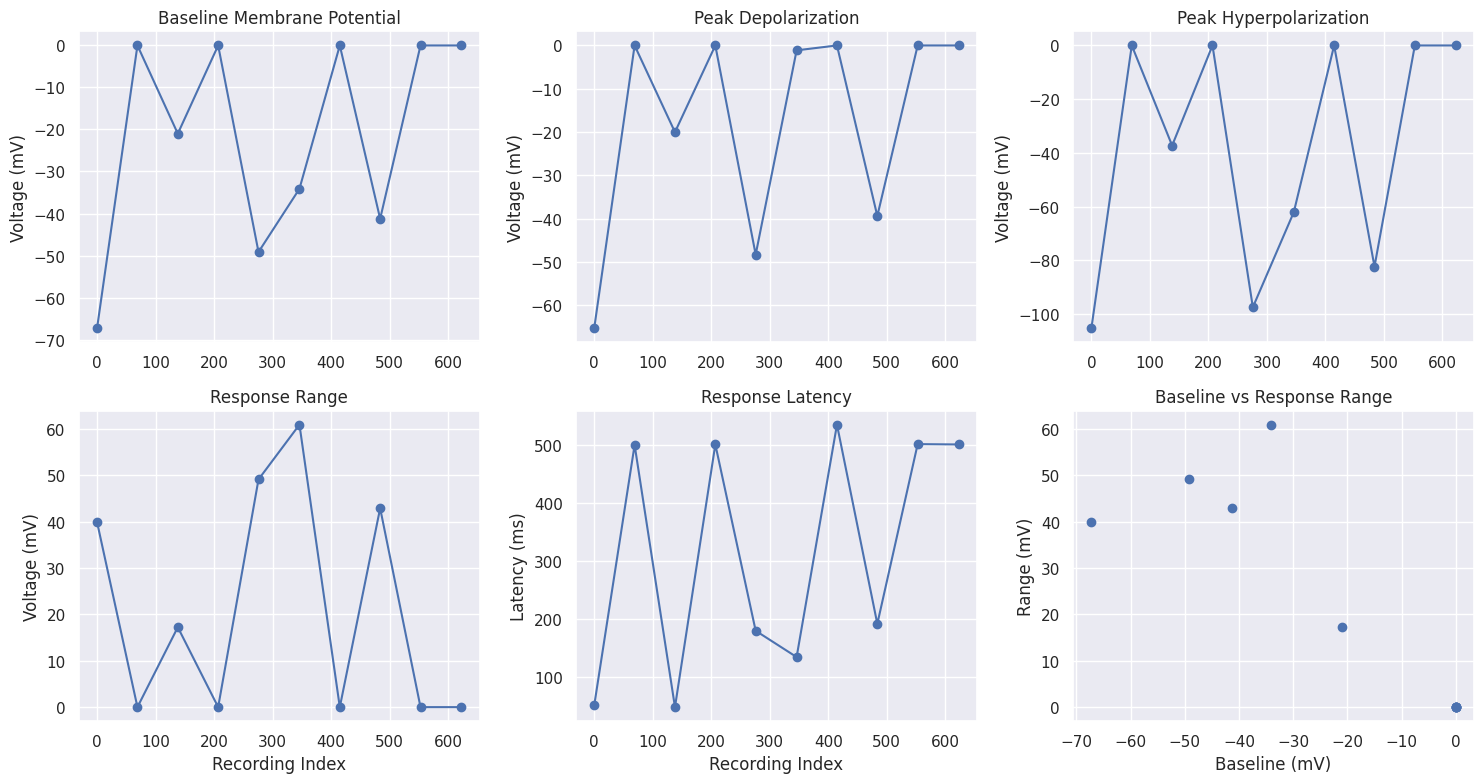

In [16]:
# Analyze response characteristics across multiple recordings
num_samples = 10
indices = np.linspace(0, min(999, len(acquisition_keys)-1), num_samples, dtype=int)

# Dictionary to store results
results = []

for idx in indices:
    response_key = acquisition_keys[idx]
    stimulus_key = stimulus_keys[idx]
    
    response = nwb.acquisition[response_key]
    stimulus = nwb.stimulus[stimulus_key]
    
    # Get data
    sample_size = 20000
    response_data = response.data[:sample_size]
    stimulus_data = stimulus.data[:sample_size]
    
    # Convert to appropriate units
    response_data_mv = response_data * response.conversion * 1e3
    stimulus_data_pa = stimulus_data * stimulus.conversion * 1e12
    
    # Calculate statistics
    baseline = np.median(response_data_mv[:int(sample_size/10)])
    peak_depol = np.max(response_data_mv)
    peak_hyperpol = np.min(response_data_mv)
    range_val = peak_depol - peak_hyperpol
    
    # Calculate response latency (time to peak hyperpolarization after stimulus onset)
    # Find stimulus onset (first significant change in stimulus)
    stim_diff = np.abs(np.diff(stimulus_data_pa))
    stim_onset_idx = np.where(stim_diff > 10)[0][0] if np.any(stim_diff > 10) else 0
    
    # Find peak hyperpolarization after stimulus onset
    peak_hyper_idx = np.argmin(response_data_mv[stim_onset_idx:]) + stim_onset_idx
    
    # Calculate latency
    latency = (peak_hyper_idx - stim_onset_idx) / response.rate
    
    # Store results
    results.append({
        'index': idx,
        'baseline': baseline,
        'peak_depol': peak_depol,
        'peak_hyperpol': peak_hyperpol,
        'range': range_val,
        'latency': latency
    })

# Create dataframe with results
results_df = pd.DataFrame(results)
display(results_df)

# Plot the results
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

axes[0, 0].plot(results_df['index'], results_df['baseline'], 'o-')
axes[0, 0].set_title("Baseline Membrane Potential")
axes[0, 0].set_ylabel("Voltage (mV)")
axes[0, 0].grid(True)

axes[0, 1].plot(results_df['index'], results_df['peak_depol'], 'o-')
axes[0, 1].set_title("Peak Depolarization")
axes[0, 1].set_ylabel("Voltage (mV)")
axes[0, 1].grid(True)

axes[0, 2].plot(results_df['index'], results_df['peak_hyperpol'], 'o-')
axes[0, 2].set_title("Peak Hyperpolarization")
axes[0, 2].set_ylabel("Voltage (mV)")
axes[0, 2].grid(True)

axes[1, 0].plot(results_df['index'], results_df['range'], 'o-')
axes[1, 0].set_title("Response Range")
axes[1, 0].set_xlabel("Recording Index")
axes[1, 0].set_ylabel("Voltage (mV)")
axes[1, 0].grid(True)

axes[1, 1].plot(results_df['index'], results_df['latency'] * 1000, 'o-')  # Convert to ms
axes[1, 1].set_title("Response Latency")
axes[1, 1].set_xlabel("Recording Index")
axes[1, 1].set_ylabel("Latency (ms)")
axes[1, 1].grid(True)

# Plot relationship between baseline and response magnitude
axes[1, 2].scatter(results_df['baseline'], results_df['range'])
axes[1, 2].set_title("Baseline vs Response Range")
axes[1, 2].set_xlabel("Baseline (mV)")
axes[1, 2].set_ylabel("Range (mV)")
axes[1, 2].grid(True)

plt.tight_layout()

## Summary of Findings and Physiological Interpretation

In this notebook, we've explored the neural responses to PAGER-Gi receptor activation in hippocampal CA1 neurons. Here's a summary of our findings with physiological interpretation:

1. **Data Organization**: 
   - The Dandiset contains multiple NWB files representing recordings from different cells/slices
   - Each file contains numerous stimulus-response pairs organized by electrodes and recording sessions
   - The data is structured to allow systematic analysis of responses before and after receptor activation

2. **Response Characteristics**:
   - **Hyperpolarization Responses**: Negative current injections consistently produced hyperpolarizing responses, as expected from Ohm's law (V = IR)
   - **Baseline Membrane Potential Shifts**: Some recordings show significant depolarization of the resting membrane potential, potentially indicating PAGER-Gi receptor activation effects on baseline conductances
   - **Rebound Responses**: Many recordings display post-hyperpolarization rebound, suggesting the activation of voltage-dependent conductances (possibly Ih current or T-type Ca2+ channels)
   - **Response Amplitude Variation**: The magnitude of voltage responses to identical current steps varies considerably, indicating changes in input resistance potentially mediated by PAGER-Gi activation

3. **Physiological Significance of Observed Changes**:
   - **G-protein Signaling Effects**: PAGER-Gi receptors likely modify neuronal properties through inhibitory G-protein signaling cascades:
     - Inhibition of adenylyl cyclase, reducing cAMP
     - Possible activation of GIRK channels (G-protein-activated inwardly rectifying K+ channels)
     - Inhibition of voltage-gated Ca2+ channels
   - **Membrane Property Alterations**: The observed changes in baseline potential and response characteristics suggest modifications of:
     - Resting K+ conductances (affecting baseline potential)
     - Input resistance (affecting response amplitudes)
     - Voltage-dependent channel dynamics (affecting rebound responses)

4. **Data Quality Considerations**:
   - Recording quality varies across the dataset
   - Some recordings show non-physiological membrane potentials
   - Quality assessment is essential for reliable interpretation

5. **Experimental Design Insights**:
   - Recordings appear to capture neuronal responses at different time points relative to PAGER activation
   - Step current injections effectively probe passive membrane properties and reveal changes induced by receptor activation

These electrophysiological recordings provide valuable insights into how PAGER-Gi receptor activation modulates the intrinsic properties and excitability of hippocampal CA1 neurons, demonstrating the potential of this engineered receptor technology for manipulating neuronal activity.

## Future Directions

Here are some potential directions for further analysis of this dataset:

1. **Time-Course Analysis of PAGER Effects**:
   - Systematically analyze how neuronal properties change over time following DCZ (100 nM) or DCZ + soluble mCherry (1 uM) application
   - Quantify the kinetics of onset and potential reversibility of receptor effects

2. **Detailed Membrane Property Calculations**:
   - Calculate input resistance (ΔV/ΔI) before and after receptor activation
   - Determine membrane time constant (τ) from exponential fits to voltage responses
   - Analyze hyperpolarization-activated currents and their modulation by PAGER-Gi

3. **Action Potential Dynamics**:
   - If depolarizing stimuli are present in the dataset, analyze how PAGER activation affects:
     - Action potential threshold
     - Firing frequency
     - Spike adaptation

4. **Comparative Pharmacological Analysis**:
   - Compare effects of DCZ alone versus DCZ + mCherry to understand the specificity of PAGER activation
   - Investigate potential dose-dependent effects if multiple concentrations were tested

5. **Cross-Subject Validation**:
   - Perform systematic comparisons across subjects to identify consistent effects versus animal-specific variability
   - Correlate effects with expression levels of the PAGER construct if available

6. **Computational Modeling**:
   - Develop biophysically detailed models of CA1 neurons incorporating PAGER-Gi signaling pathways
   - Simulate and predict cellular responses to various stimuli and receptor activation scenarios

In [17]:
# Close any open file handles to prevent resource leaks
# Note: We don't need to explicitly close the NWB files in this case